In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering

/home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering


In [2]:
import pandas as pd
from Levenshtein import distance as levenshtein_distance

# Evaluate the distance to Subtilisin BPN'

In [3]:
subtilisin_BPN = 'AQSVPYGVSQIKAPALHSQGYTGSNVKVAVIDSGIDSSHPDLKVAGGASMVPSETNPFQDNNSHGTHVAGTVAALNNSIGVLGVAPSASLYAVKVLGADGSGQYSWIINGIEWAIANNMDVINMSLGGPSGSAAL' \
    'KAAVDKAVASGVVVVAAAGNEGTSGSSSTVGYPGKYPSVIAVGAVDSSNQRASFSSVGPELDVMAPGVSIQSTLPGNKYGAYNGTSMASPHVAGAAALILSKHPNWTNTQVRSSLENTTTKLGDSFYYGKGLINVQAAAQ'

def edit_distance2BPN(variant_seq):
    try:
        return levenshtein_distance(variant_seq, subtilisin_BPN)
    except:
        raise Exception(f"variant_seq value error {variant_seq}")

## Baseline 10k training data

In [ ]:
train_path = 'data/round1/prior/subtilisin-train.csv'
train_data = pd.read_csv(train_path)

train = train_data['sequence'].tolist()
train_data['seq_len'] = train_data['sequence'].str.len()
train_data['dist2BPN'] = [edit_distance2BPN(seq) for seq in train_data['sequence']]

train_10k = train_data.sample(10000)

train_10k.to_csv('data/round1/prior/subtilisin-train-10k.csv', index=False)
len(train_10k)

10000

## 10k samples from Prior model

In [ ]:
prior_sample_path = 'data/round1/prior/prior_10k_samples.txt'

prior_10k = pd.read_csv(prior_sample_path)
prior_10k['seq_len'] = prior_10k['seqs'].str.len()
prior_10k['dist2BPN'] = [edit_distance2BPN(seq)  if not pd.isna(seq) else len(subtilisin_BPN) for seq in prior_10k['seqs']]
len(prior_10k)

9982

## 10k samples from finetuned Prior model

In [ ]:
BPN_prior_sample_path = 'data/round1/prior/ft_10k_samples.txt'


BPN_prior_10k = pd.read_csv(BPN_prior_sample_path)
BPN_prior_10k['seq_len'] = BPN_prior_10k['seqs'].str.len()
BPN_prior_10k['dist2BPN'] = [edit_distance2BPN(seq)  if not pd.isna(seq) else len(subtilisin_BPN) for seq in BPN_prior_10k['seqs']]
len(BPN_prior_10k)

4161

In [9]:
def show_min_max(prop):
    min_max = [train_10k[prop].values.min(),train_10k[prop].values.max(), \
               prior_10k[prop].values.min(),prior_10k[prop].values.max(), \
               BPN_prior_10k[prop].values.min(),BPN_prior_10k[prop].values.max()]
    print(f"{prop}: min = {min(min_max)}, max = {max(min_max)}")

    print(f"final {prop}: mean = {BPN_prior_10k[prop].mean()}, median = {BPN_prior_10k[prop].median()}")

show_min_max('dist2BPN')

dist2BPN: min = 2, max = 366
final dist2BPN: mean = 6.951934631098293, median = 4.0


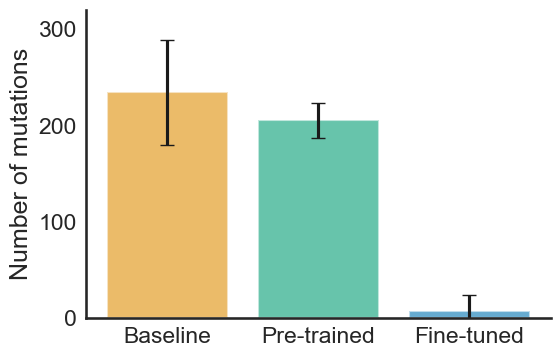

In [10]:
from utils import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

prop = 'dist2BPN'
ylabel = 'Number of mutations'

# show the mean and std of the distributions
train_mean = train_10k[prop].mean()
train_std = train_10k[prop].std()
prior_mean = prior_10k[prop].mean()
prior_std = prior_10k[prop].std()
BPN_prior_mean = BPN_prior_10k[prop].mean()
BPN_prior_std = BPN_prior_10k[prop].std()

# plot a bar plot to compare the mumber of mutations
ax.bar([1, 2, 3], [train_mean, prior_mean, BPN_prior_mean], 
       yerr=[train_std, prior_std, BPN_prior_std],
       color=[plot_style_utils.CAT_PALETTE[1], plot_style_utils.CAT_PALETTE[2], plot_style_utils.CAT_PALETTE[0]],
       alpha=0.6, capsize=5)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Baseline', 'Pre-trained', 'Fine-tuned'])
ax.set_ylabel(ylabel)

ax.set_ylim([0, 320])
plot_style_utils.save_for_pub(fig=fig, path="figures/round1/prior_dist2bpn_barplot")